# 4.10 Instacart Analysis Final Report Part 2

## This script contain following points:

### 01. Customer profiling

### 02. Statistics on a customer-profile level for usage frequency and expenditure

### 03. Compare your customer profiles with regions and departments

### 04. Visualization

## 01. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Import the high activity customer dataset

In [2]:
# Create path
path = r'C:\Users\Quinn\OneDrive\Documents\CF - Data Analyst\Data Immersion\Instacart Basket Analysis'

In [3]:
# Import prepared dataset
df_high = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_high_activicty.pkl'))

In [4]:
# Import department dataset
department = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [5]:
df_high.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'Gender', 'STATE', 'Age', 'date_joined', 'dependants', ' family_status',
       'income', '_merge', 'region', 'customer_activity'],
      dtype='object')

In [6]:
df_high.shape

(30964564, 34)

In [7]:
# Drop unnecessary columns
df_high = df_high.drop(['_merge','customer_activity'], axis = 1)

In [8]:
df_high.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'Gender', 'STATE', 'Age', 'date_joined', 'dependants', ' family_status',
       'income', 'region'],
      dtype='object')

## 03. Customer profiling

### 3.1. Setting conditions

In [9]:
# Fixing formatting to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [10]:
df_high['Age'].describe() #to determine how to categorize age group

count   30964564.00
mean          49.47
std           18.49
min           18.00
25%           33.00
50%           49.00
75%           65.00
max           81.00
Name: Age, dtype: float64

#### For the purpose of the analysis, I defined 3 main age groups as young adult (18 - 33), middle age (34 - 65) and senior (over 65)

In [11]:
# Create a flag column for age group
df_high.loc[(df_high['Age'] >= 18) & (df_high['Age'] <= 33),'age_group'] = 'young adult'

In [12]:
df_high.loc[(df_high['Age'] >= 34) & (df_high['Age'] <= 65),'age_group'] = 'middle age'

In [13]:
df_high.loc[(df_high['Age'] >= 66),'age_group'] = 'senior'

In [14]:
df_high['age_group'].value_counts(dropna = False) #Check if all entries are labeled

age_group
middle age     15476265
young adult     7757465
senior          7730834
Name: count, dtype: int64

In [15]:
df_high['income'].describe() #to determine how to categorize income

count   30964564.00
mean       99675.87
std        43141.87
min        25903.00
25%        67292.00
50%        96765.00
75%       128102.00
max       593901.00
Name: income, dtype: float64

#### Income is stratified into three distinct tiers base on statistic percentile of the data: 'low income' (ranging from 25093 to 67292), 'middle class' (from 67292 to 128102), and 'upper class' (over 128102).

In [16]:
# Create a flag column for income range
df_high.loc[(df_high['income'] >= 25093) & (df_high['income'] <= 67292),'income_range'] = 'low income'

In [17]:
df_high.loc[(df_high['income'] > 67292) & (df_high['income'] <= 128102),'income_range'] = 'middle class'

In [18]:
df_high.loc[(df_high['income'] > 128102),'income_range'] = 'upper class'

In [19]:
df_high['income_range'].value_counts(dropna = False) #Check if all entries are labeled

income_range
middle class    15482125
low income       7741348
upper class      7741091
Name: count, dtype: int64

In [20]:
# Create a flag column for customers with dependants
df_high.loc[df_high['dependants'] == 0, 'dependant_flag'] = 'no dependant'

In [21]:
df_high.loc[df_high['dependants'] != 0, 'dependant_flag'] = 'have dependant'

In [22]:
df_high['dependant_flag'].value_counts(dropna = False) #Check if all entries are labeled

dependant_flag
have dependant    23224883
no dependant       7739681
Name: count, dtype: int64

### 3.2. Create customers profile

In [23]:
# Create customer profile column
df_high['customer_profile'] = df_high['age_group'] + ', ' + df_high['income_range'] + ', ' + df_high['dependant_flag'] 

In [24]:
df_high['customer_profile'].value_counts(dropna = False) #Check if all entries are labeled

customer_profile
middle age, middle class, have dependant     5726568
middle age, upper class, have dependant      3497357
young adult, middle class, have dependant    3058027
senior, middle class, have dependant         2832842
young adult, low income, have dependant      2693043
middle age, low income, have dependant       2358079
senior, upper class, have dependant          2232647
middle age, middle class, no dependant       1900492
middle age, upper class, no dependant        1199967
young adult, middle class, no dependant      1018819
senior, middle class, no dependant            945377
young adult, low income, no dependant         900289
middle age, low income, no dependant          793802
senior, low income, have dependant            759624
senior, upper class, no dependant             723833
senior, low income, no dependant              236511
young adult, upper class, have dependant       66696
young adult, upper class, no dependant         20591
Name: count, dtype: int64

In [25]:
#Create a profile_id column for further visualization
df_high.loc[df_high['customer_profile'] == 'middle age, middle class, have dependant', 'profile_id'] = '1'

In [26]:
df_high.loc[df_high['customer_profile'] == 'middle age, upper class, have dependant', 'profile_id'] = '2'

In [27]:
df_high.loc[df_high['customer_profile'] == 'middle age, low income, have dependant', 'profile_id'] = '3'

In [28]:
df_high.loc[df_high['customer_profile'] == 'young adult, middle class, have dependant', 'profile_id'] = '4'

In [29]:
df_high.loc[df_high['customer_profile'] == 'young adult, low income, have dependant', 'profile_id'] = '5'

In [30]:
df_high.loc[df_high['customer_profile'] == 'senior, middle class, have dependant', 'profile_id'] = '6'

In [31]:
df_high.loc[df_high['customer_profile'] == 'senior, upper class, have dependant', 'profile_id'] = '7'

In [32]:
df_high.loc[df_high['customer_profile'] == 'middle age, middle class, no dependant', 'profile_id'] = '8'

In [33]:
df_high.loc[df_high['customer_profile'] == 'middle age, upper class, no dependant', 'profile_id'] = '9'

In [34]:
df_high.loc[df_high['customer_profile'] == 'senior, low income, have dependant', 'profile_id'] = '10'

In [35]:
df_high.loc[df_high['customer_profile'] == 'young adult, low income, no dependant', 'profile_id'] = '11'

In [36]:
df_high.loc[df_high['customer_profile'] == 'middle age, low income, no dependant', 'profile_id'] = '12'

In [37]:
df_high.loc[df_high['customer_profile'] == 'young adult, middle class, no dependant', 'profile_id'] = '13'

In [38]:
df_high.loc[df_high['customer_profile'] == 'senior, middle class, no dependant', 'profile_id'] = '14'

In [39]:
df_high.loc[df_high['customer_profile'] == 'senior, upper class, no dependant', 'profile_id'] = '15'

In [40]:
df_high.loc[df_high['customer_profile'] == 'senior, low income, no dependant', 'profile_id'] = '16'

In [41]:
df_high.loc[df_high['customer_profile'] == 'young adult, upper class, have dependant', 'profile_id'] = '17'

In [42]:
df_high.loc[df_high['customer_profile'] == 'young adult, upper class, no dependant', 'profile_id'] = '18'

In [43]:
# Create a profile dictionary
profile_dict = {
    '1': 'middle age, middle class, have dependant',
    '2': 'middle age, upper class, have dependant',
    '3': 'middle age, low income, have dependant',
    '4': 'young adult, middle class, have dependant',
    '5': 'young adult, low income, have dependant',
    '6': 'senior, middle class, have dependant',
    '7': 'senior, upper class, have dependant',
    '8': 'middle age, middle class, no dependant',
    '9': 'middle age, upper class, no dependant',
    '10': 'senior, low income, have dependant',
    '11': 'young adult, low income, no dependant',
    '12': 'middle age, low income, no dependant',
    '13': 'young adult, middle class, no dependant',
    '14': 'senior, middle class, no dependant',
    '15': 'senior, upper class, no dependant',
    '16': 'senior, low income, no dependant',
    '17': 'young adult, upper class, have dependant',
    '18': 'young adult, upper class, no dependant',
}

In [44]:
#Creating a subset of the individual users
df_unique = df_high.drop_duplicates(subset = ['user_id'])

In [45]:
# Actual number of customers based on their profile
df_unique['customer_profile'].value_counts(dropna = False)

customer_profile
middle age, middle class, have dependant     28119
middle age, upper class, have dependant      17302
middle age, low income, have dependant       15408
young adult, middle class, have dependant    15080
young adult, low income, have dependant      15049
senior, middle class, have dependant         14057
senior, upper class, have dependant          11044
middle age, middle class, no dependant        9413
middle age, upper class, no dependant         5805
senior, low income, have dependant            5603
young adult, low income, no dependant         5202
middle age, low income, no dependant          5174
young adult, middle class, no dependant       4993
senior, middle class, no dependant            4589
senior, upper class, no dependant             3641
senior, low income, no dependant              1835
young adult, upper class, have dependant       242
young adult, upper class, no dependant          75
Name: count, dtype: int64

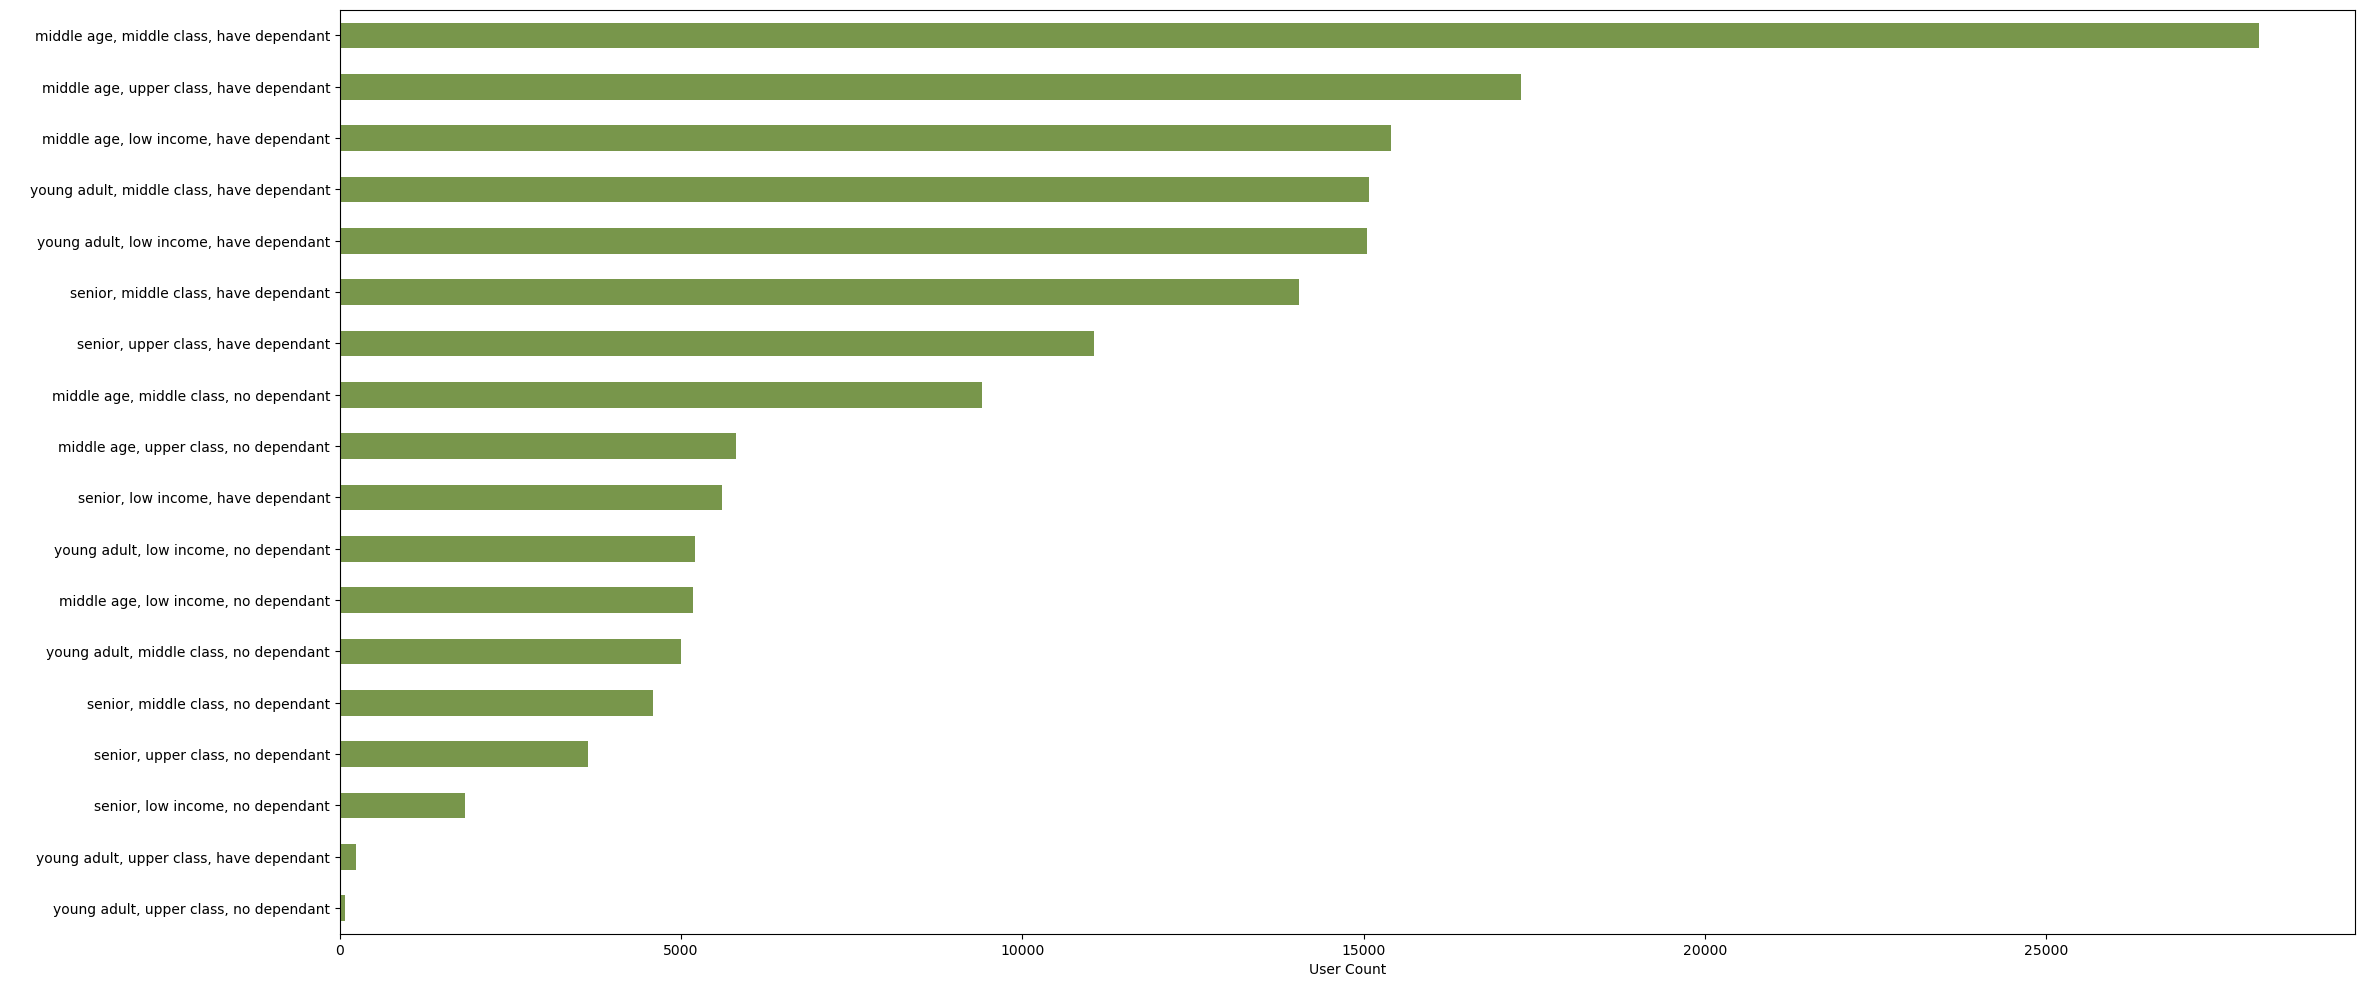

In [46]:
# Visualize the distribution of customer profile
bar_cusprofile_dist = df_unique['customer_profile'].value_counts(dropna= False).sort_values(ascending= True).plot.barh(color='#78964b')
fig = plt.gcf()
fig.set_size_inches(26, 12)
plt.ylabel(' ') # Eliminate y lable
plt.xlabel('User Count')
plt.show()

In [47]:
# Exporting chart
bar_cusprofile_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_distribution.png'))

### 3.3. Order hour among customer profiles

In [48]:
# Group by customer profile and order hour of day
order_hour_profile = df_high.groupby(['customer_profile', 'order_hour_of_day']).size().unstack()

In [49]:
# Calculating mode 
order_hour_profile_mode = df_high.groupby('customer_profile')['order_hour_of_day'].apply(lambda x: x.mode().iloc[0])

In [50]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'customer_profile': order_hour_profile_mode.index, 'customer_profile_order_hours_mode': order_hour_profile_mode.values})

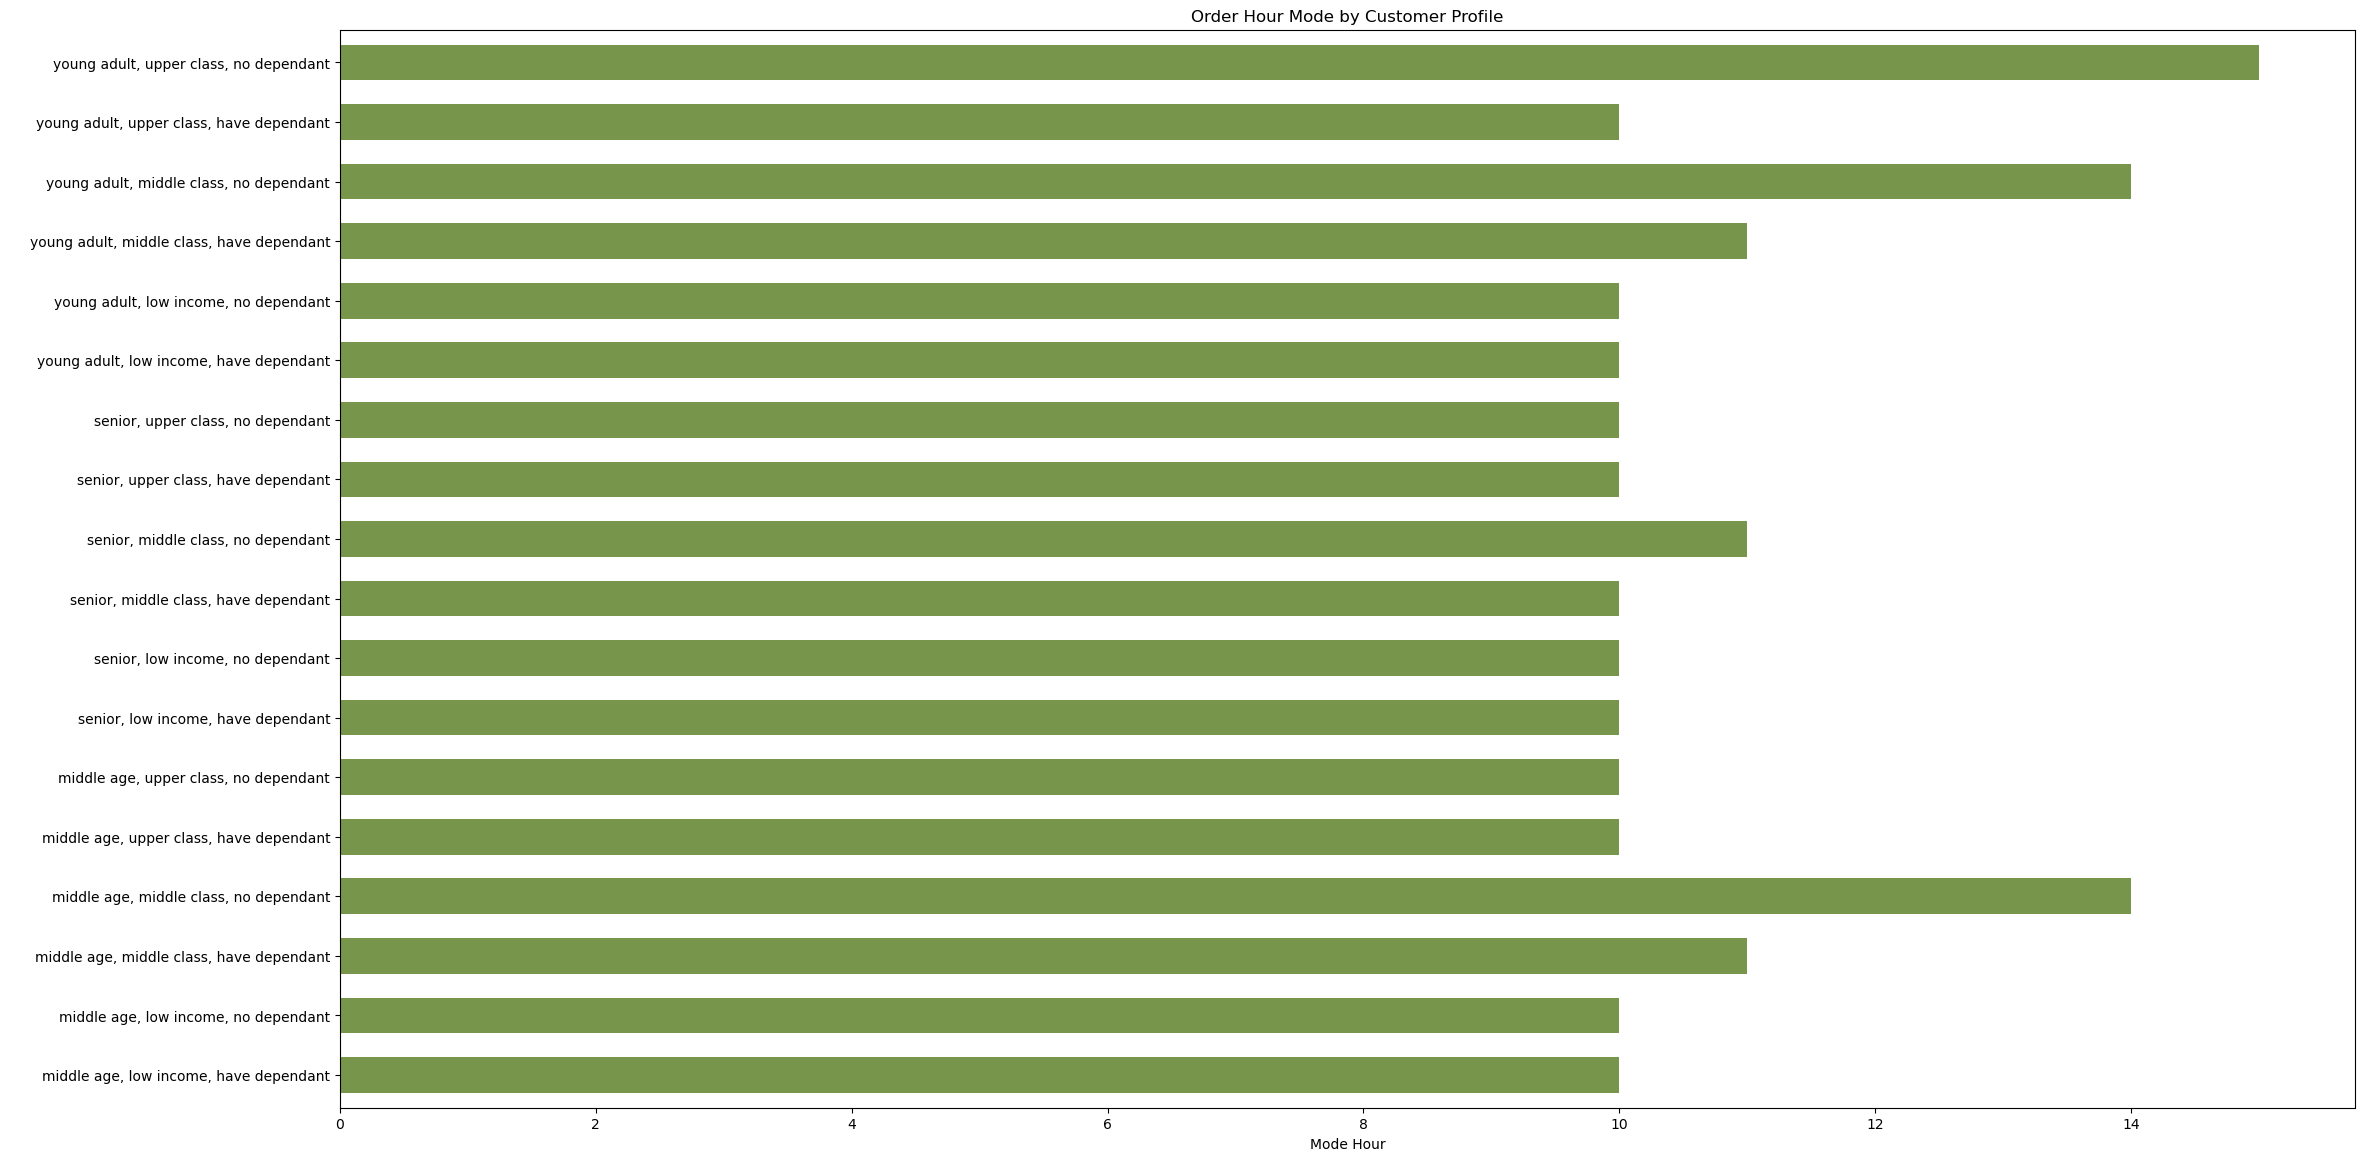

In [51]:
# Visualize the distribution of customer profile
bar_cusprofile_order_mode = plot_data.plot(kind='barh', x='customer_profile', y='customer_profile_order_hours_mode', color='#78964b', legend = False, width = 0.6)
fig = plt.gcf()
fig.set_size_inches(26, 14)
plt.title('Order Hour Mode by Customer Profile')
plt.ylabel(' ') # Eliminate y lable
plt.xlabel('Mode Hour')
plt.show()


#### There is a difference in mode order hours based on customer profiles. Customers from the middle and upper class with higher income prefer to place orders in the afternoon (12 PM to 4 PM), and people with low income usually place orders at 10 AM.

In [52]:
# Exporting chart
bar_cusprofile_order_mode.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_mode_hour.png'))

## 4. Statistics on a customer-profile level for usage frequency and expenditure

### 4.1. Order frequency

In [53]:
# Order frequency by customer profile
freq_customer_profile = df_high.groupby('customer_profile').agg({'days_since_last_order': ['mean','min','max']})
freq_customer_profile

days_since_last_order           
                                                           mean  min   max
customer_profile                                                          
middle age, low income, have dependant                    11.01 0.00 30.00
middle age, low income, no dependant                      10.89 0.00 30.00
middle age, middle class, have dependant                  10.74 0.00 30.00
middle age, middle class, no dependant                    10.73 0.00 30.00
middle age, upper class, have dependant                   10.83 0.00 30.00
middle age, upper class, no dependant                     10.67 0.00 30.00
senior, low income, have dependant                        11.02 0.00 30.00
senior, low income, no dependant                          11.36 0.00 30.00
senior, middle class, have dependant                      10.81 0.00 30.00
senior, middle class, no dependant                        10.68 0.00 30.00
senior, upper class, have dependant                       10.71 0.00 30.00
senior, upper class, no dependant                         10.73 0.00 30.00
young adult, low income, have dependant                   10.89 0.00 30.00
young adult, low income, no dependant                     10.97 0.00 30.00
young adult, middle class, have dependant                 10.78 0.00 30.00
young adult, middle class, no dependant                   10.85 0.00 30.00
young adult, upper class, have dependant                  10.08 0.00 30.00
young adult, upper class, no dependant                    10.14 0.00 30.00

#### Senior and middle age people with low income have the most extensive average time between orders. Otherwise, young people with high income have the shortest interval between orders. 

### 4.2. Expenditure by customer profiles

In [54]:
# Expenditure
spend_customer_profile = df_high.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})
spend_customer_profile

prices           
                                            mean  min   max
customer_profile                                           
middle age, low income, have dependant      7.16 1.00 25.00
middle age, low income, no dependant        7.14 1.00 25.00
middle age, middle class, have dependant    7.96 1.00 25.00
middle age, middle class, no dependant      7.97 1.00 25.00
middle age, upper class, have dependant     7.95 1.00 25.00
middle age, upper class, no dependant       7.94 1.00 25.00
senior, low income, have dependant          6.70 1.00 25.00
senior, low income, no dependant            6.71 1.00 25.00
senior, middle class, have dependant        7.95 1.00 25.00
senior, middle class, no dependant          7.96 1.00 25.00
senior, upper class, have dependant         7.96 1.00 25.00
senior, upper class, no dependant           7.95 1.00 25.00
young adult, low income, have dependant     7.59 1.00 25.00
young adult, low income, no dependant       7.60 1.00 25.00
young adult, middle class, have dependant   7.96 1.00 25.00
young adult, middle class, no dependant     7.94 1.00 25.00
young adult, upper class, have dependant    7.80 1.00 25.00
young adult, upper class, no dependant      7.75 1.00 25.00

#### On average, people with middle and upper income spend more than other groups. As opposed, low-income people spend less than others. 

## 5. Compare your customer profiles with regions and departments

### 5.1. By regions

In [55]:
# Customer profile by region
profile_region = pd.crosstab(df_unique['profile_id'], df_unique['region'], dropna = False).sort_values(by = 'South', ascending = False)

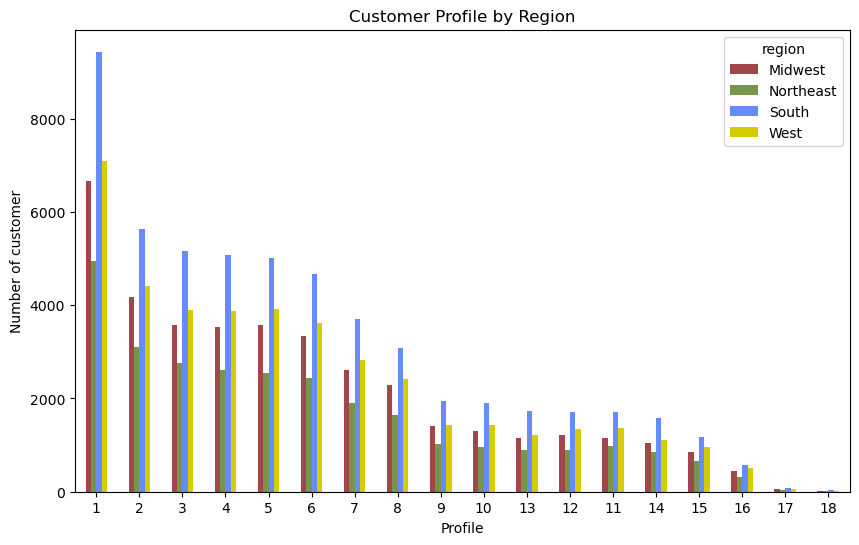

In [56]:
# Visualize this information
bar_profile_region = profile_region.plot.bar(color = ['#a1464b','#78964b','#668bfd','#d6cc00'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Region')
plt.xlabel('Profile')
plt.ylabel('Number of customer')
plt.show()

#### There is no difference in distribution of customer profiles based on region. In all region, profile 1 (middle age, middle class, have dependant) has the largest count of customers. Next are profile 2 (middle age, upper class, have dependant) and 3 (middle age, low income, have dependant) respectively. 

In [57]:
# Exporting chart
bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_region.png'))

### 5.2. By departments

In [58]:
department

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [59]:
# In department 1 (Frozen)
profile_department_frozen = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 1, dropna = False).sort_values(by = True , ascending = False)

In [60]:
profile_department_frozen[True]

profile_id
1     397463
2     243831
4     208463
6     196699
5     184012
7     155467
3     153553
8     131625
9      82989
13     70041
14     65299
11     58824
15     51771
12     51386
10     47233
16     16061
17      5662
18      1352
Name: True, dtype: int64

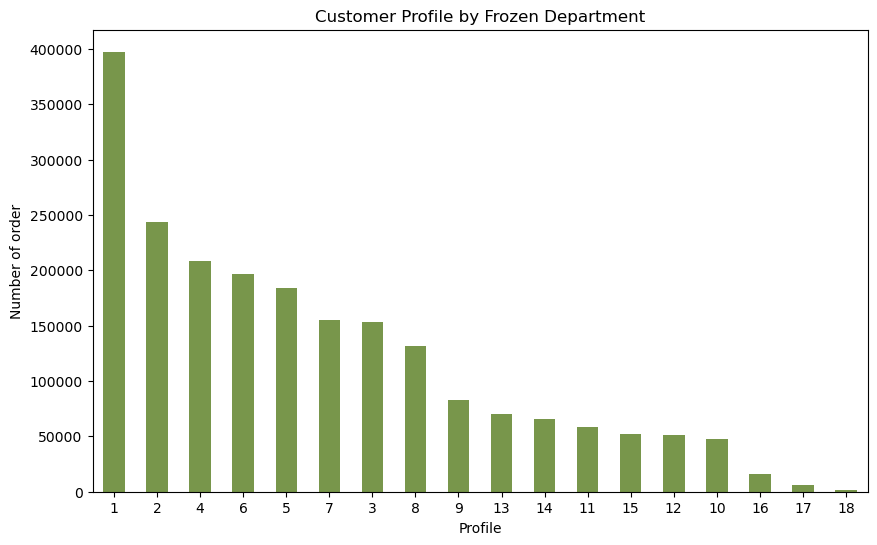

In [61]:
# Visualize this information
bar_profile_frozen = profile_department_frozen[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Frozen Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

#### Customers with profile 1 (middle age, middle class, have dependant) order most from frozen department

In [62]:
# Exporting chart
bar_profile_frozen.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_frozen.png'))

In [63]:
# In department 3 (Bakery)
profile_bakery = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 3, dropna = False).sort_values(by = True , ascending = False)

In [64]:
profile_bakery[True]

profile_id
1     207681
2     131855
4     111264
6     103579
5      95695
7      82956
3      79359
8      71532
9      44879
13     37100
14     34422
11     32863
15     26349
12     25758
10     23794
16      7358
17      3250
18      1134
Name: True, dtype: int64

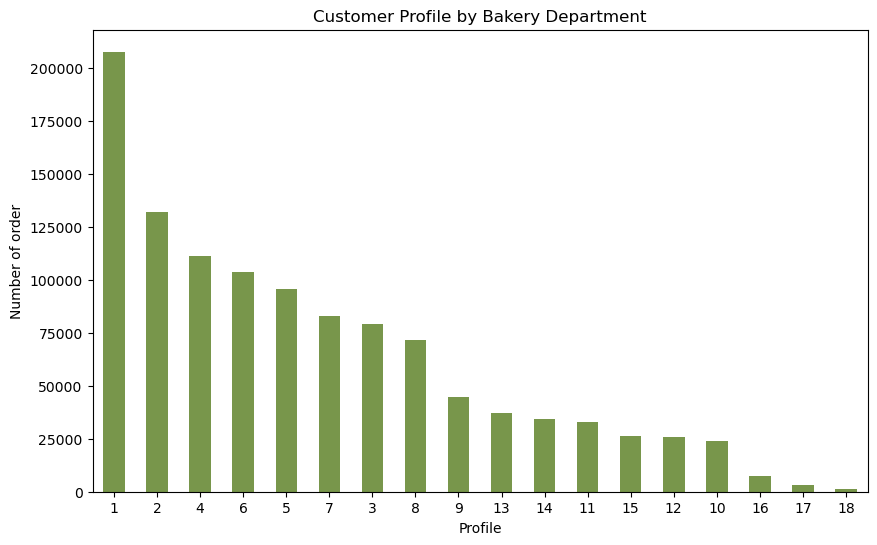

In [65]:
# Visualize this information
bar_profile_bakery = profile_bakery[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Bakery Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

#### Customers with profile 1 (middle age, middle class, have dependant) order most from bakery department

In [66]:
# Exporting chart
bar_profile_bakery.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_bakery.png'))

In [67]:
# In department 4 (Produce)
profile_produce = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 4, dropna = False).sort_values(by = True , ascending = False)

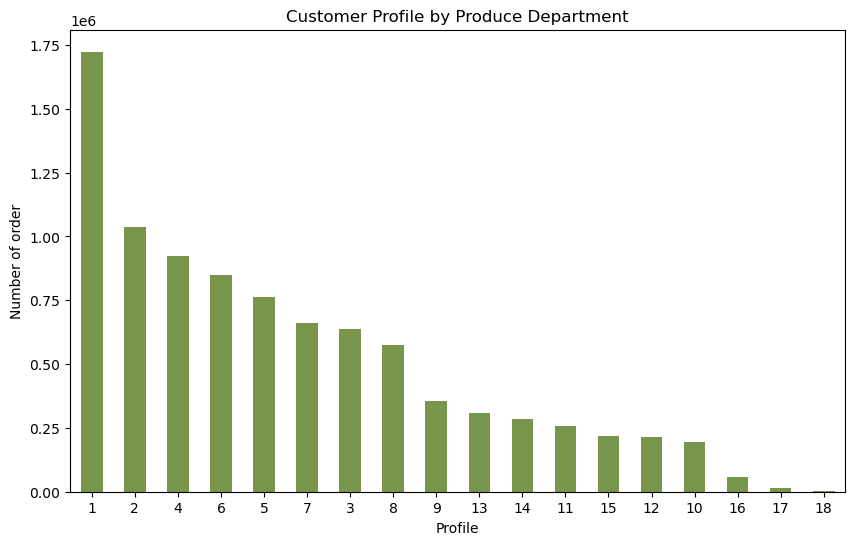

In [68]:
# Visualize this information
bar_profile_produce = profile_produce[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Produce Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

#### Customers with profile 1 (middle age, middle class, have dependant) order most from produce department

In [69]:
# Exporting chart
bar_profile_produce.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_produce.png'))

In [70]:
# In department 5 (Alcohol)
profile_alcohol = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 5, dropna = False).sort_values(by = True , ascending = False)

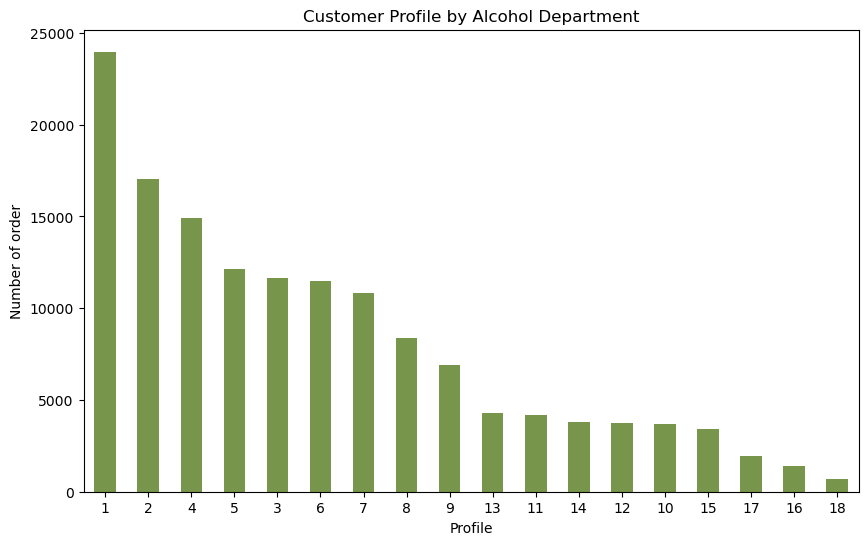

In [71]:
# Visualize this information
bar_profile_alcohol = profile_alcohol[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Alcohol Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

#### Customers with profile 1 (middle age, middle class, have dependant) order most from alcohol department

In [72]:
# Exporting chart
bar_profile_alcohol.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_alcohol.png'))

In [73]:
# In department 6 (International)
profile_inter = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 6, dropna = False).sort_values(by = True , ascending = False)

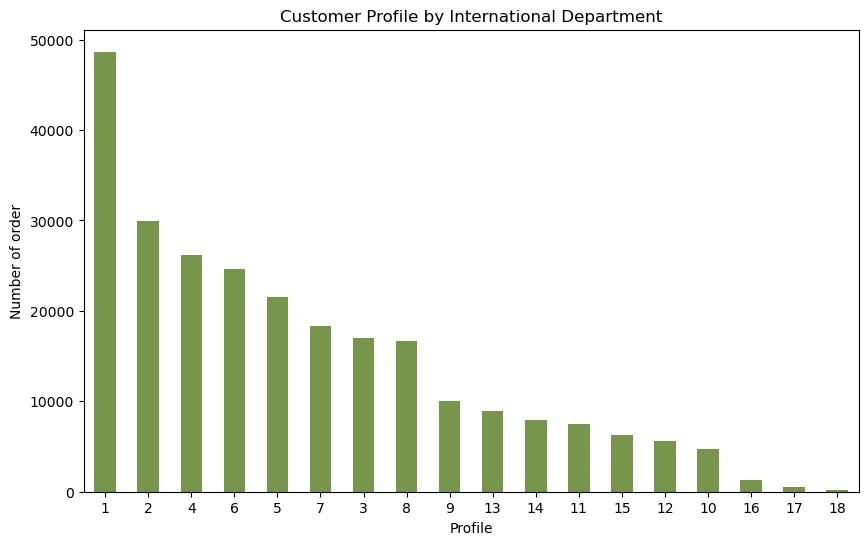

In [74]:
# Visualize this information
bar_profile_inter = profile_inter[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by International Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

#### Customers with profile 1 (middle age, middle class, have dependant) order most from alcohol department

In [75]:
# Exporting chart
bar_profile_inter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_international.png'))

In [76]:
# In department 7 (Beverages)
profile_beverage = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 7, dropna = False).sort_values(by = True , ascending = False)

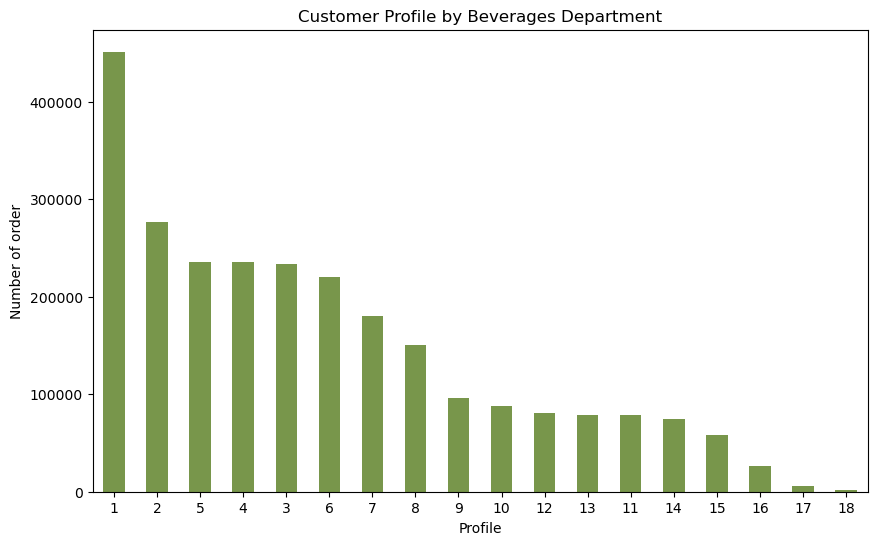

In [77]:
# Visualize this information
bar_profile_beverage = profile_beverage[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Beverages Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [78]:
# Exporting chart
bar_profile_beverage.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_beverage.png'))

In [79]:
# In department 8 (Pets)
profile_pet = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 8, dropna = False).sort_values(by = True , ascending = False)

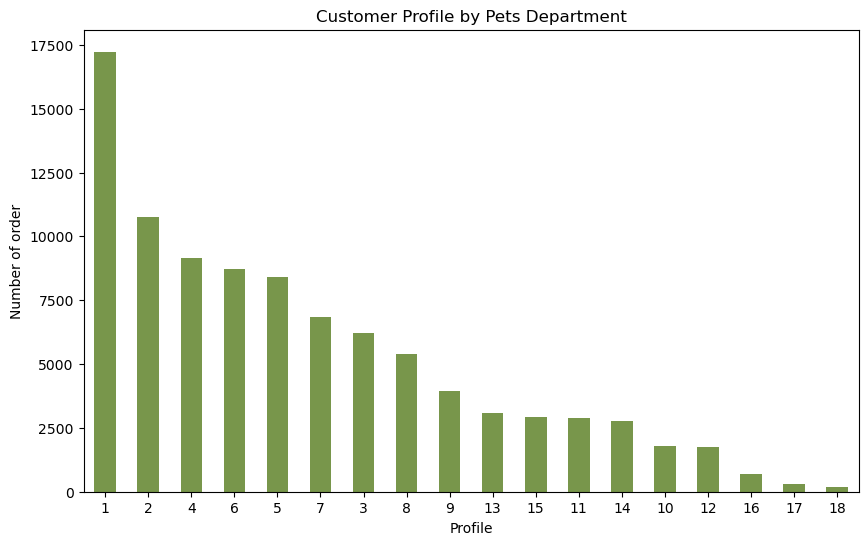

In [80]:
# Visualize this information
bar_profile_pet = profile_pet[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Pets Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [81]:
# Exporting chart
bar_profile_pet.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_pets.png'))

In [82]:
# In department 9 (Dry goods pasta)
profile_pasta = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 9, dropna = False).sort_values(by = True , ascending = False)

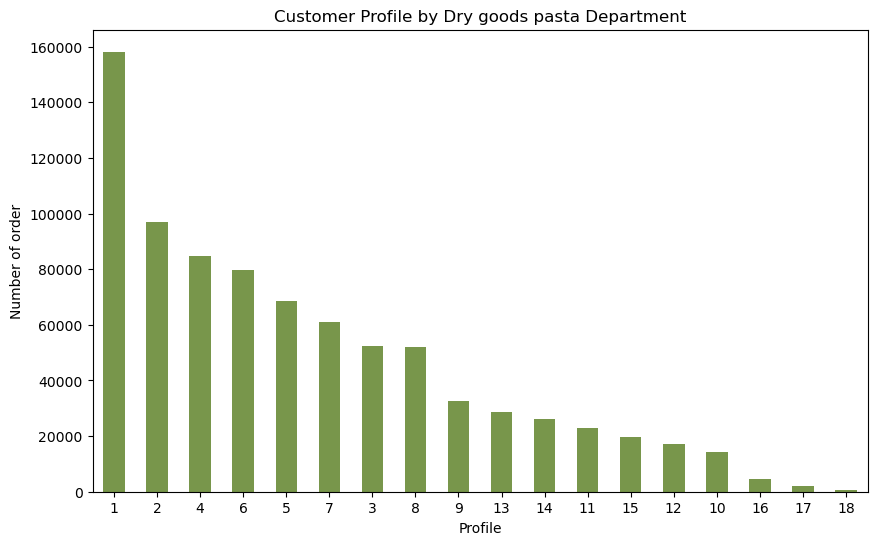

In [83]:
# Visualize this information
bar_profile_pasta = profile_pasta[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Dry goods pasta Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [84]:
# Exporting chart
bar_profile_pasta.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_dried_pasta.png'))

In [85]:
# In department 10 (Bulk)
profile_bulk = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 10, dropna = False).sort_values(by = True , ascending = False)

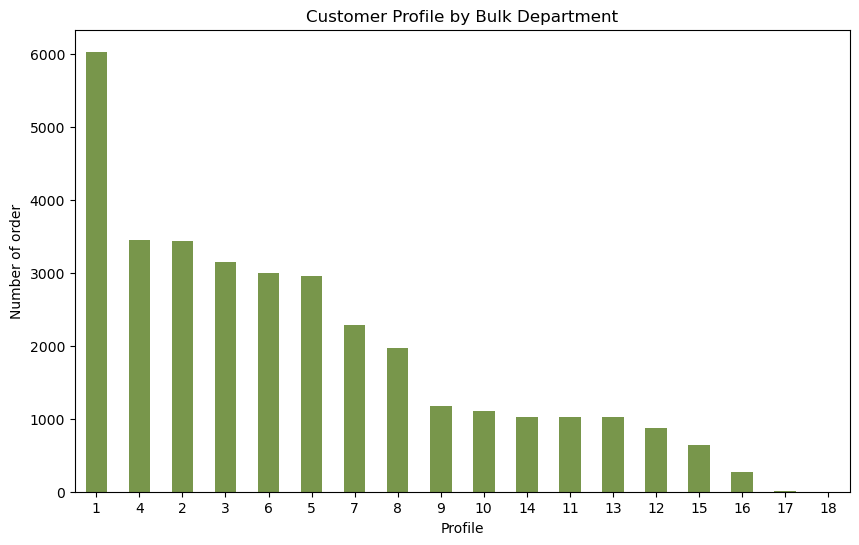

In [86]:
# Visualize this information
bar_profile_bulk = profile_bulk[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Bulk Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [87]:
# Exporting chart
bar_profile_bulk.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_bulk.png'))

In [88]:
# In department 11 (Personal Care)
profile_personcare = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 11, dropna = False).sort_values(by = True , ascending = False)

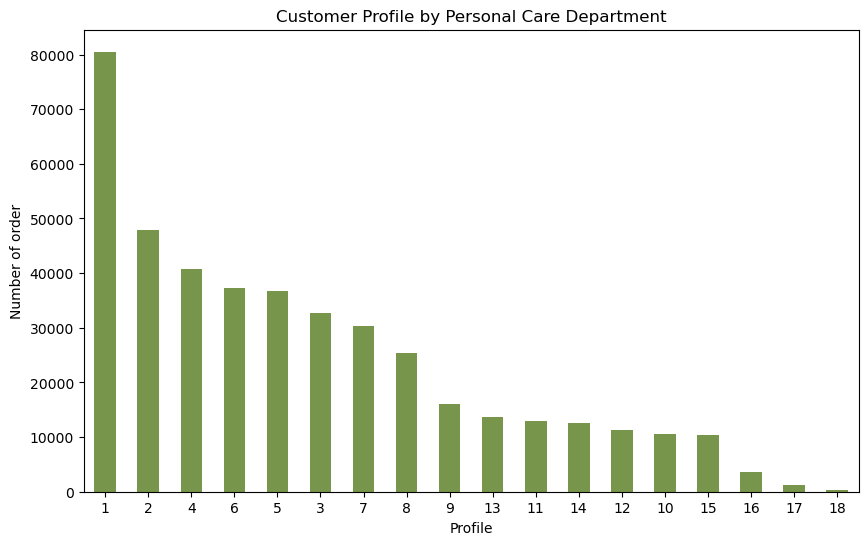

In [89]:
# Visualize this information
bar_profile_personcare = profile_personcare[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Personal Care Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [90]:
# Exporting chart
bar_profile_personcare.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_personalcare.png'))

In [91]:
# In department 12 (Meat Seafood)
profile_meat = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 12, dropna = False).sort_values(by = True , ascending = False)

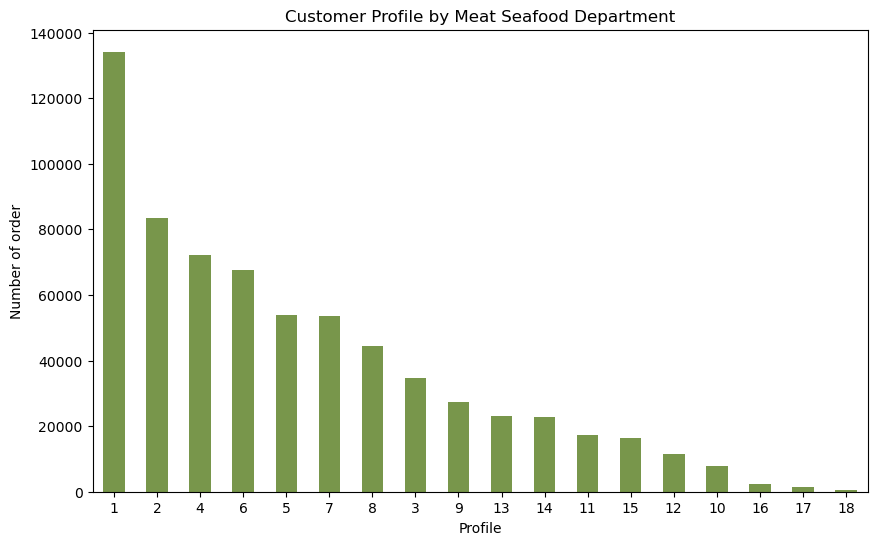

In [92]:
# Visualize this information
bar_profile_meat = profile_meat[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Meat Seafood Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [93]:
# Exporting chart
bar_profile_meat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_meat.png'))

In [94]:
# In department 13 (Pantry)
profile_pantry = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 13, dropna = False).sort_values(by = True , ascending = False)

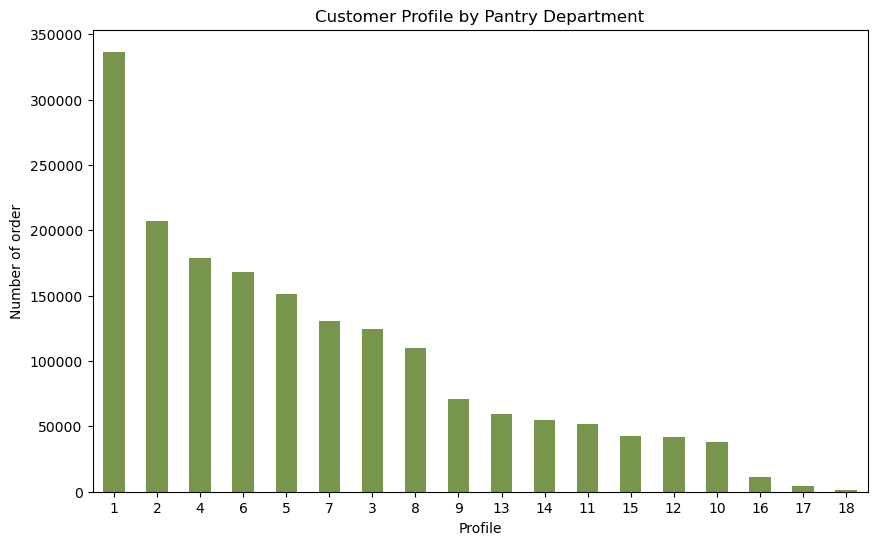

In [95]:
# Visualize this information
bar_profile_pantry = profile_pantry[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Pantry Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [96]:
# Exporting chart
bar_profile_pantry.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_pantry.png'))

In [98]:
# In department 14 (Breakfast)
profile_breakfast = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 14, dropna = False).sort_values(by = True , ascending = False)

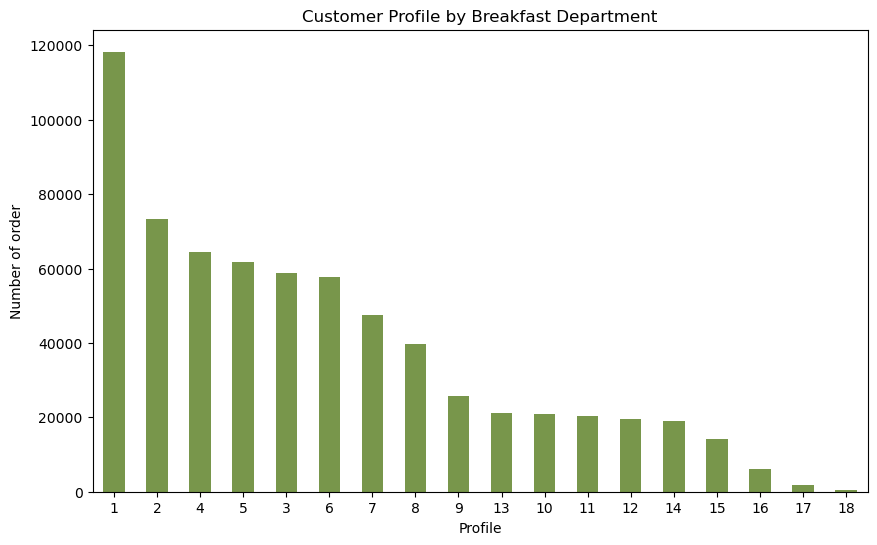

In [128]:
# Visualize this information
bar_profile_breakfast = profile_breakfast[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Breakfast Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [129]:
# Exporting chart
bar_profile_breakfast.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_breakfast.png'))

In [130]:
# In department 15 (Canned goods)
profile_canned = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 15, dropna = False).sort_values(by = True , ascending = False)

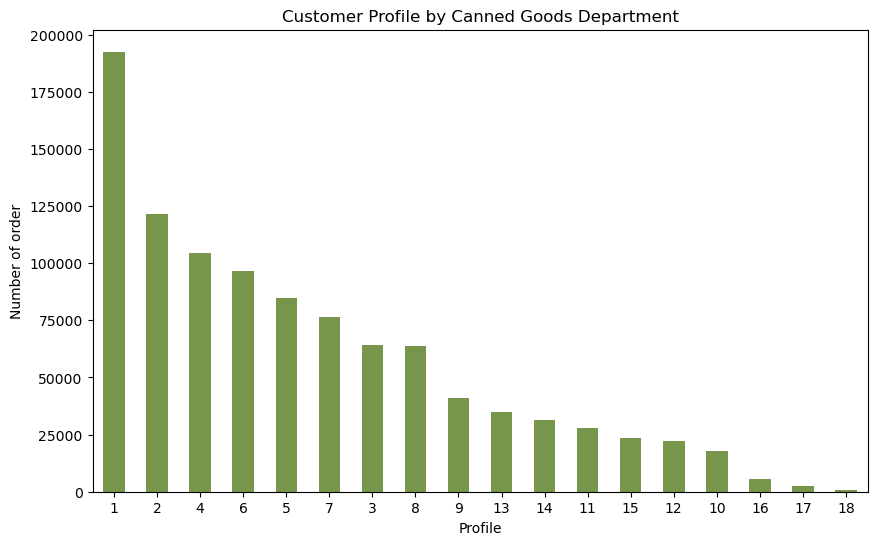

In [131]:
# Visualize this information
bar_profile_canned = profile_canned[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Canned Goods Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [132]:
# Exporting chart
bar_profile_canned.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_canned.png'))

In [133]:
# In department 16 (Diary eggs)
profile_diegg = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 16, dropna = False).sort_values(by = True , ascending = False)

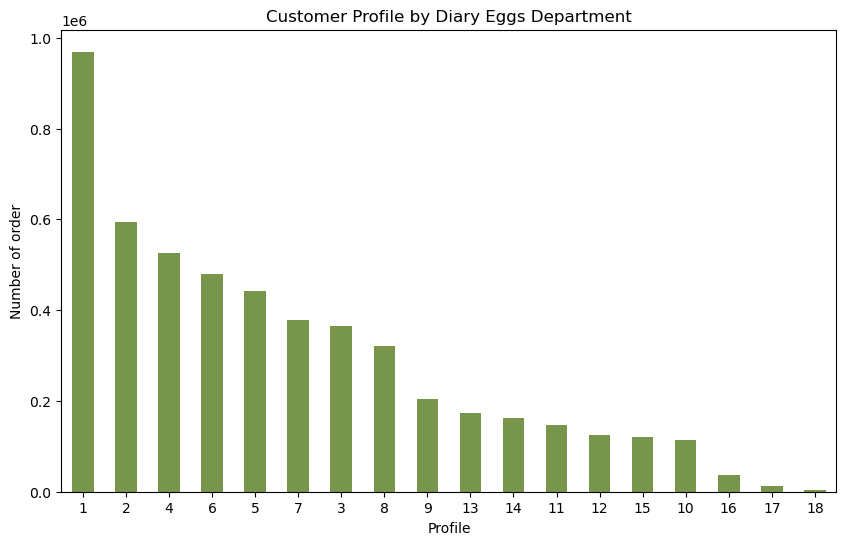

In [134]:
# Visualize this information
bar_profile_diegg = profile_diegg[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Diary Eggs Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [135]:
# Exporting chart
bar_profile_diegg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_diaryeggs.png'))

In [136]:
# In department 17 (Household)
profile_hhold = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 17, dropna = False).sort_values(by = True , ascending = False)

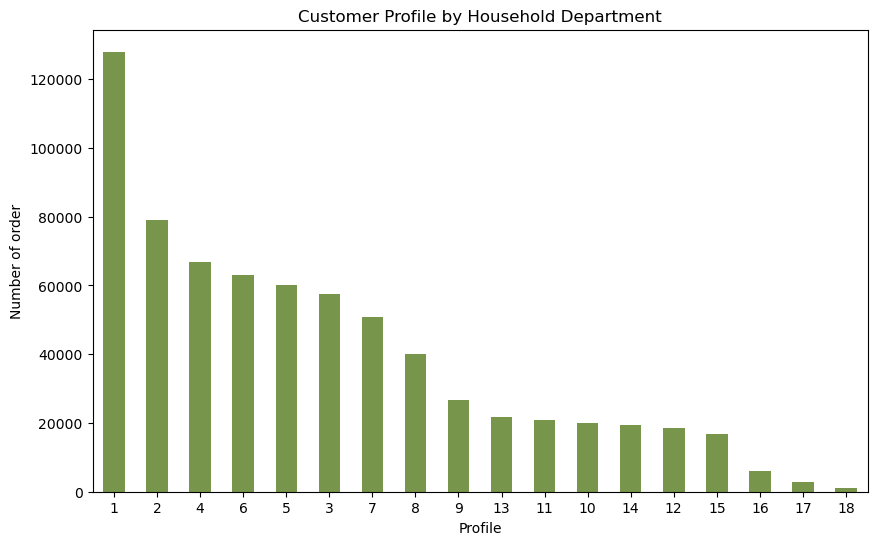

In [137]:
# Visualize this information
bar_profile_hhold = profile_hhold[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Household Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [138]:
# Exporting chart
bar_profile_hhold.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_household.png'))

In [139]:
# In department 18 (Babies)
profile_babies = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 18, dropna = False).sort_values(by = True , ascending = False)

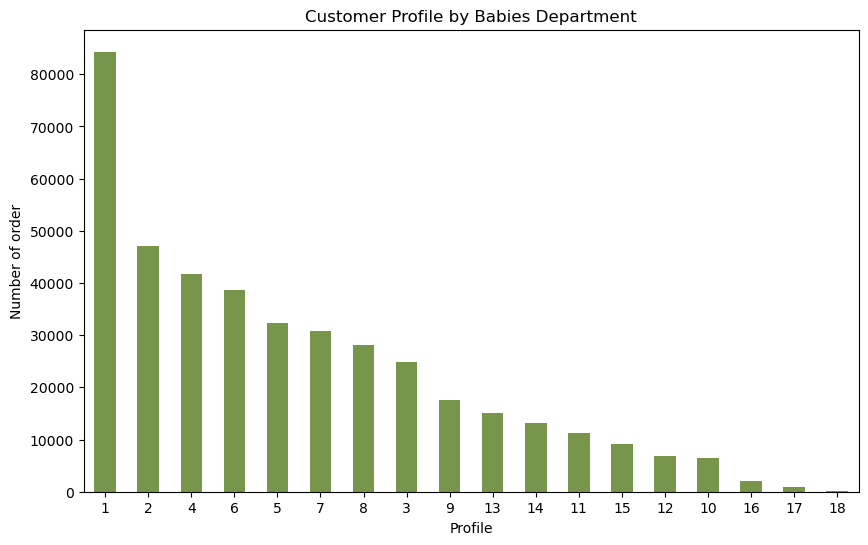

In [140]:
# Visualize this information
bar_profile_babies = profile_babies[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Babies Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [141]:
# Exporting chart
bar_profile_babies.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_babies.png'))

In [142]:
# In department 19 (Snacks)
profile_snack = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 19, dropna = False).sort_values(by = True , ascending = False)

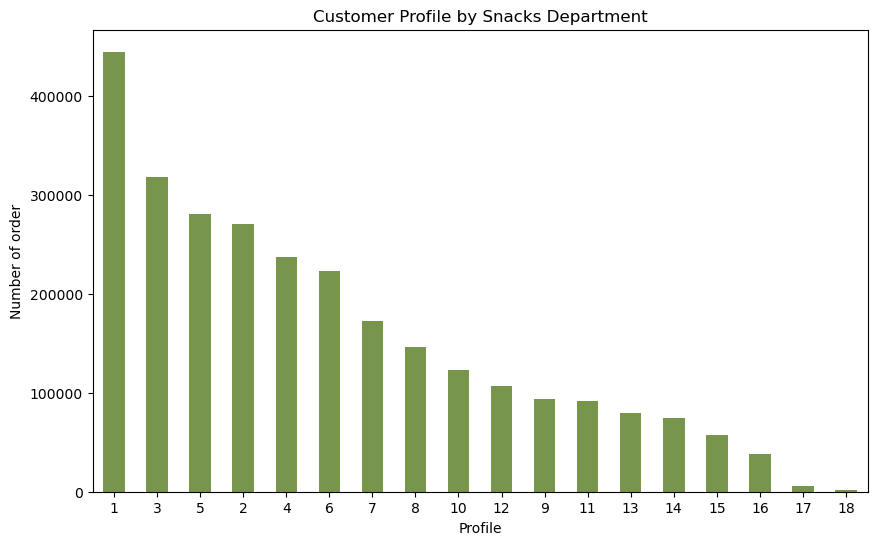

In [143]:
# Visualize this information
bar_profile_snack = profile_snack[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Snacks Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [144]:
# Exporting chart
bar_profile_snack.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_snacks.png'))

In [145]:
# In department 20 (Deli)
profile_deli = pd.crosstab(df_high['profile_id'], df_high['department_id'] == 20, dropna = False).sort_values(by = True , ascending = False)

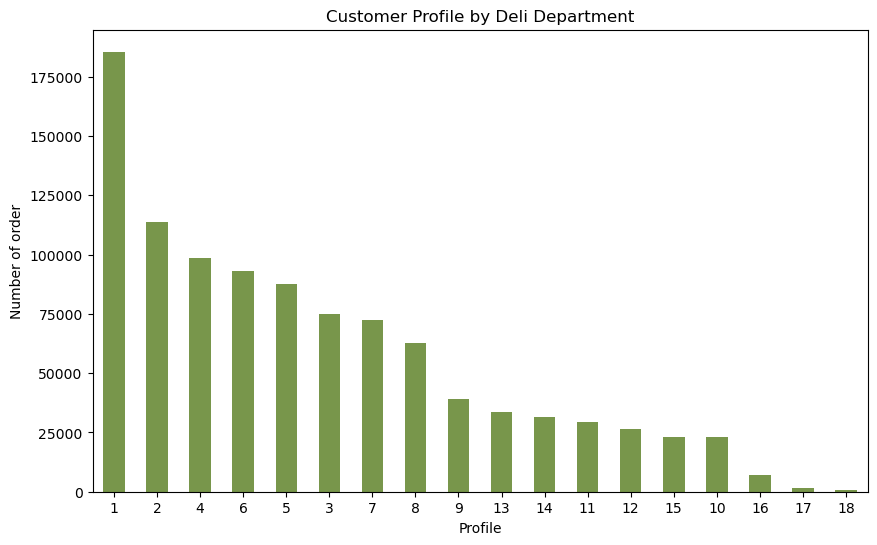

In [146]:
# Visualize this information
bar_profile_deli = profile_deli[True].plot.bar(color = ['#78964b'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Deli Department')
plt.xlabel('Profile')
plt.ylabel('Number of order')
plt.show()

In [147]:
# Exporting chart
bar_profile_deli.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_deli.png'))

### 5.3. By loyalty, frequency and spender status

In [148]:
# By loyalty
profile_loyalty = pd.crosstab(df_unique['profile_id'], df_high['loyalty_flag'], dropna = False).sort_values(by = 'Loyal customer' , ascending = False)

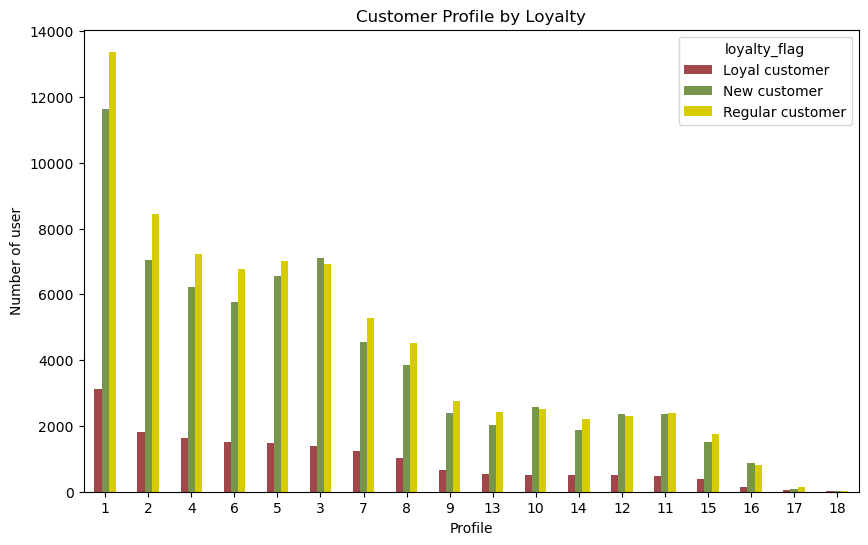

In [149]:
# Visualize this information
bar_profile_loyalty = profile_loyalty.plot.bar(color = ['#a1464b','#78964b','#d6cc00'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Loyalty')
plt.xlabel('Profile')
plt.ylabel('Number of user')
plt.show()

In [150]:
# Exporting chart
bar_profile_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_loyalty.png'))

In [151]:
# By frequency flag
profile_frequency = pd.crosstab(df_unique['profile_id'], df_high['frequency_flag'], dropna = False).sort_values(by = 'Frequent Customer' , ascending = False)

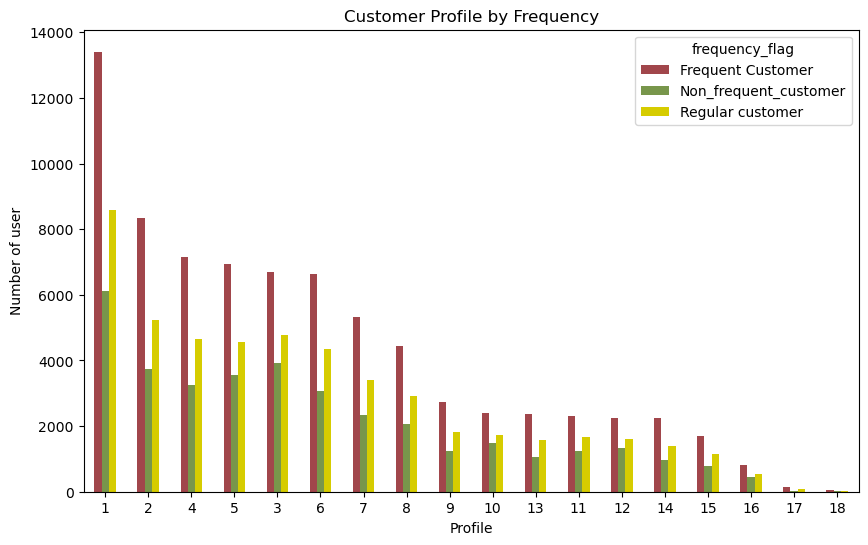

In [152]:
# Visualize this information
bar_profile_frequency = profile_frequency.plot.bar(color = ['#a1464b','#78964b','#d6cc00'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Frequency')
plt.xlabel('Profile')
plt.ylabel('Number of user')
plt.show()

In [153]:
# Exporting chart
bar_profile_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_frequency.png'))

In [154]:
# By spender flag
profile_spender = pd.crosstab(df_unique['profile_id'], df_high['spender_flag'], dropna = False).sort_values(by = 'High spender' , ascending = False)

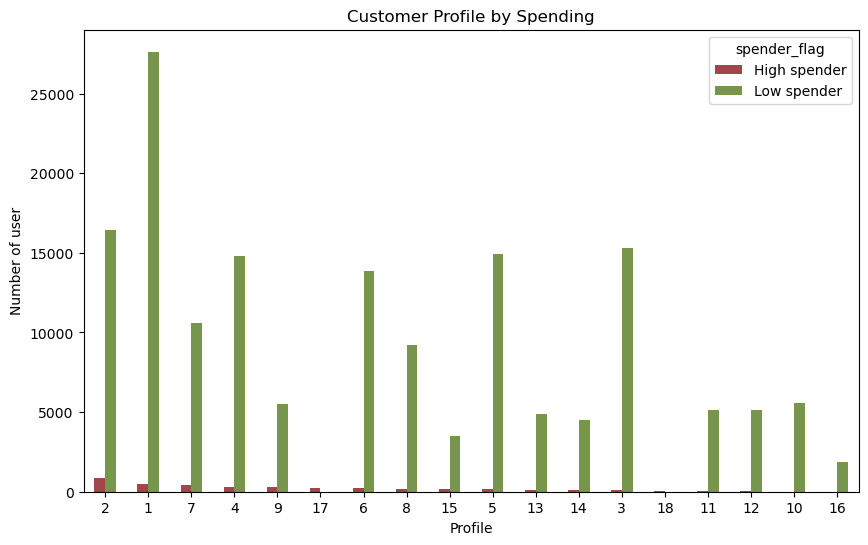

In [155]:
# Visualize this information
bar_profile_spender = profile_spender.plot.bar(color = ['#a1464b','#78964b','#d6cc00'], rot = 0)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Customer Profile by Spending')
plt.xlabel('Profile')
plt.ylabel('Number of user')
plt.show()

In [156]:
# Exporting chart
bar_profile_spender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile_spending.png'))

In [158]:
df_high.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_high_customer_profile.pkl'))